In [1]:
import pandas as pd 
import numpy as np 
import pickle
import os 
from scipy.stats import norm
os.chdir(r'C:\Users\User\Desktop\StochasticOptimization\Optimization\Algorithms\Genetic Algorithm')
from ga import *
os.chdir(r'C:\Users\User\Desktop\StochasticOptimization\Optimization\Algorithms\Bayesian MCMC')
from BayesianOptimizer import *
import time
from xgboost.sklearn import XGBRegressor
import matplotlib.pyplot as plt


In [2]:
# read-in all results
BaseDirectory = r'C:\Users\User\Desktop\StochasticOptimization\Optimization\CollapseLoss_DBE\Optimization_TotalLoss_Hoffman'
os.chdir(BaseDirectory + '\Results')

x_bests = pd.DataFrame(columns=[0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4], index = range(200))

for i in range(1, 201):
    results = pd.read_csv('%ithOptimization.csv'%i)
    x_bests.iloc[i-1,:] = results.values[0][1:]

(0.7, 1.5)

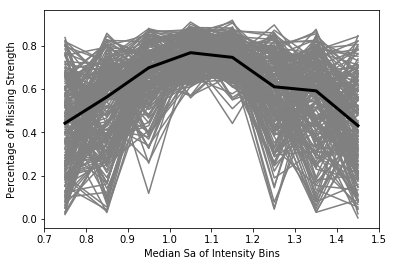

In [47]:
for i in range(200):
    plt.plot([0.75, 0.85, 0.95, 1.05, 1.15, 1.25, 1.35, 1.45], list(x_bests.iloc[i,:].values), color='grey')
plt.plot([0.75, 0.85, 0.95, 1.05, 1.15, 1.25, 1.35, 1.45], np.median(x_bests, axis = 0), color = 'black', linewidth = 3)
plt.xlabel('Median Sa of Intensity Bins')
plt.ylabel('Percentage of Missing Strength')
plt.xlim([0.7, 1.5])

## Compare the results under 75% DBE

In [17]:
# Sample unknown buildings 
def samplecase(OriginalData):
    InventoryData = OriginalData
    InventoryData = InventoryData.drop(columns = ['SMS'])
    for i in range(InventoryData.shape[0]):
        # Randomly assign number of stories
        if np.isnan(InventoryData.iloc[i,2]):
            InventoryData.iloc[i,2] = np.random.choice(np.arange(2, 4), p=[0.759, 0.241])
            
        # Randomly assign floor type          
        if pd.isnull(InventoryData.iloc[i,3]):
            InventoryData.iloc[i,3] = np.random.choice(np.arange(1, 5), p=[0.159, 0.011, 0.458, 0.372])
            
    
    
    InventoryData.loc[InventoryData['Story'] == 2,'Story'] = "2"
    InventoryData.loc[InventoryData['Story'] == 3,'Story'] = "3"
    
    InventoryData.loc[InventoryData['Type'] == 1,'Type'] = 'FWL1'
    InventoryData.loc[InventoryData['Type'] == 2,'Type'] = 'FWL2'
    InventoryData.loc[InventoryData['Type'] == 3,'Type'] = 'FWL3'
    InventoryData.loc[InventoryData['Type'] == 4,'Type'] = 'FWL4'
    
    InventoryData.loc[InventoryData['Type'] == 'FWL1','Type'] = 'L1'
    InventoryData.loc[InventoryData['Type'] == 'FWL2','Type'] = 'L2'
    InventoryData.loc[InventoryData['Type'] == 'FWL3','Type'] = 'L3'
    InventoryData.loc[InventoryData['Type'] == 'FWL4','Type'] = 'L4'
    
#     Randomly assign material type 
    mat = np.random.choice(np.arange(1, 3), size = InventoryData.shape[0], p=[0.5, 0.5])
    InventoryData['Material'] = mat
    
    InventoryData.loc[InventoryData['Material'] == 1,'Material'] = 'GWB'
    InventoryData.loc[InventoryData['Material'] == 2,'Material'] = 'HWS'
    
#     Randomly assign dimension 
    dim = np.random.choice(np.arange(1, 3), size = InventoryData.shape[0], p=[0.5, 0.5])
    InventoryData['Dimension'] = dim
    
#     Assign floor type
    InventoryData.loc[(InventoryData['Type'] == 'L1') & (InventoryData['Dimension'] == 1),'Dimension'] = '60X30'
    InventoryData.loc[(InventoryData['Type'] == 'L1') & (InventoryData['Dimension'] == 2),'Dimension'] = '100X30'
    
    InventoryData.loc[(InventoryData['Type'] == 'L1') & (InventoryData['Dimension'] == '60X30') 
                      & (InventoryData['Story'] == '2'),'Area'] = 60*30*2
    InventoryData.loc[(InventoryData['Type'] == 'L1') & (InventoryData['Dimension'] == '60X30') 
                      & (InventoryData['Story'] == '3'),'Area'] = 60*30*3
    InventoryData.loc[(InventoryData['Type'] == 'L1') & (InventoryData['Dimension'] == '100X30') 
                      & (InventoryData['Story'] == '2'),'Area'] = 100*30*2
    InventoryData.loc[(InventoryData['Type'] == 'L1') & (InventoryData['Dimension'] == '100X30') 
                      & (InventoryData['Story'] == '3'),'Area'] = 100*30*3
    
    InventoryData.loc[(InventoryData['Type'] == 'L2') & (InventoryData['Dimension'] == 1),'Dimension'] = '60X50'
    InventoryData.loc[(InventoryData['Type'] == 'L2') & (InventoryData['Dimension'] == 2),'Dimension'] = '100X50'
    
    InventoryData.loc[(InventoryData['Type'] == 'L2') & (InventoryData['Dimension'] == '60X50') 
                      & (InventoryData['Story'] == '2'),'Area'] = 60*50*2
    InventoryData.loc[(InventoryData['Type'] == 'L2') & (InventoryData['Dimension'] == '60X50') 
                      & (InventoryData['Story'] == '3'),'Area'] = 60*50*3
    InventoryData.loc[(InventoryData['Type'] == 'L2') & (InventoryData['Dimension'] == '100X50') 
                      & (InventoryData['Story'] == '2'),'Area'] = 100*50*2
    InventoryData.loc[(InventoryData['Type'] == 'L2') & (InventoryData['Dimension'] == '100X50') 
                      & (InventoryData['Story'] == '3'),'Area'] = 100*50*3
    
    InventoryData.loc[(InventoryData['Type'] == 'L3') & (InventoryData['Dimension'] == 1),'Dimension'] = '50X30'
    InventoryData.loc[(InventoryData['Type'] == 'L3') & (InventoryData['Dimension'] == 2),'Dimension'] = '80X30'
    
    InventoryData.loc[(InventoryData['Type'] == 'L3') & (InventoryData['Dimension'] == '50X30') 
                      & (InventoryData['Story'] == '2'),'Area'] = 50*30*2
    InventoryData.loc[(InventoryData['Type'] == 'L3') & (InventoryData['Dimension'] == '50X30') 
                      & (InventoryData['Story'] == '3'),'Area'] = 50*30*3
    InventoryData.loc[(InventoryData['Type'] == 'L3') & (InventoryData['Dimension'] == '80X30') 
                      & (InventoryData['Story'] == '2'),'Area'] = 80*30*2
    InventoryData.loc[(InventoryData['Type'] == 'L3') & (InventoryData['Dimension'] == '80X30') 
                      & (InventoryData['Story'] == '3'),'Area'] = 80*30*3
    
    InventoryData.loc[(InventoryData['Type'] == 'L4') & (InventoryData['Dimension'] == 1),'Dimension'] = '60X50'
    InventoryData.loc[(InventoryData['Type'] == 'L4') & (InventoryData['Dimension'] == 2),'Dimension'] = '100X50'
    
    InventoryData.loc[(InventoryData['Type'] == 'L4') & (InventoryData['Dimension'] == '60X50') 
                      & (InventoryData['Story'] == '2'),'Area'] = 60*50*2
    InventoryData.loc[(InventoryData['Type'] == 'L4') & (InventoryData['Dimension'] == '60X50') 
                      & (InventoryData['Story'] == '3'),'Area'] = 60*50*3
    InventoryData.loc[(InventoryData['Type'] == 'L4') & (InventoryData['Dimension'] == '100X50') 
                      & (InventoryData['Story'] == '2'),'Area'] = 100*50*2
    InventoryData.loc[(InventoryData['Type'] == 'L4') & (InventoryData['Dimension'] == '100X50') 
                      & (InventoryData['Story'] == '3'),'Area'] = 100*50*3

    InventoryData['Index'] = InventoryData['Type'] + '-' + InventoryData['Story'] + 'S-' + InventoryData['Dimension'].astype('str') + '-' + InventoryData['Material']
    
    #     Randomly assign repair cost
    InventoryData['Num_Units'] = (np.round(InventoryData['Area'].values/1000)).astype(int)
    Median_Cost = np.interp(InventoryData['Num_Units'],[4,30],[6250,4000])
    
    InventoryData['RepairCost'] = np.random.normal(Median_Cost,400)*InventoryData['Num_Units']
    
    return InventoryData

In [32]:
os.chdir(r'C:\Users\User\Desktop\XGBoostPipline\Models\MixedTrainTest\Retrofit')
# retrof_slight_ratio = pickle.load(open('Retrof_Slight_Ratio.pkl','rb'))
# retrof_moderate_ratio = pickle.load(open('Retrof_Moderate_Ratio.pkl','rb'))
# retrof_severe_ratio = pickle.load(open('Retrof_Severe_Ratio.pkl','rb'))
retrof_complete_ratio = pickle.load(open('Retrof_Complete_Ratio.pkl','rb'))

os.chdir(BaseDirectory)
OriginalBuildingInfo = pd.read_csv('LA Inventory.csv')

# Random assign unknown buildings
sampled_building_info = samplecase(OriginalBuildingInfo)
# sampled_building_info = pd.read_csv(r'C:\Users\User\Desktop\Optimization\CollapseLoss_DBE\sampled_building_info.csv') # use the same sampled building info to compare the results

# Optimize for the M7.1 senario
sa_simulated = pd.read_csv('DBEResults\Sa_simulated_real.csv', header = None)

# Read existing building damage state
existing_ds = pd.read_csv('building_ds.csv')

# Read existing building properties and pushover 
existing_prop = pd.read_csv('building_performance.csv')

# Read building configuration, which is mainly used for loss assessment 
building_config = pd.read_csv('building_configuration.csv')

# Read building losses
total_loss = pd.read_csv('ds_loss.csv')

# Read building fatality 
# total_fatality = pd.read_csv('fatality_rate.csv')
# Use complete loss as criteria: complete loss = building collapse loss + fatality loss ($2 million per fatality)
total_fatality = pd.read_csv('complete_loss.csv') 

# Read retrofit upper limit, which corresponding to NON SWOF building peak strength
retrof_upper_limit = pd.read_csv('UpperLimit.csv')

# Read missing strength
missing_strength = pd.read_csv('building_miss_strength.csv')

# Read existing building damage state medians
existing_ds = pd.read_csv('building_ds.csv')

# Existing pushover peak strength
peak_strength = pd.DataFrame()
peak_strength['Index'] = existing_prop['Index']
peak_strength['Xpeakstrength'] = np.multiply(existing_prop['SeismicWeight'], existing_prop['Xpeakstrength'])
peak_strength['Zpeakstrength'] = np.multiply(existing_prop['SeismicWeight'], existing_prop['Zpeakstrength'])

[23:38:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [36]:
def total_strength(percentage_miss_strength, sampled_building_info, Sa_map, miss_strength, IM_bin):
    '''
    This function is developed for compute the total strength added by algorithm
    '''
    buildings = pd.DataFrame(data = sampled_building_info['Index'])
    cost_map = pd.DataFrame(np.zeros(Sa_map.shape))
    for k in range(8):
        temp = pd.DataFrame() 
        temp['Index'] = existing_prop['Index']
        temp['Total Force'] = np.multiply(percentage_miss_strength[k], miss_strength['X Diff']) + np.multiply(percentage_miss_strength[k], miss_strength['Z Diff'])
        for j in range(Sa_map.shape[1]):
            sub_Sa_map = Sa_map.loc[(Sa_map.iloc[:,j] < IM_bin[k+1]) & (Sa_map.iloc[:,j] > IM_bin[k]), :].iloc[:,j]
            if sub_Sa_map.shape[0] == 0: 
                continue
            sub_building_map = buildings.loc[(Sa_map.iloc[:,j] < IM_bin[k+1]) & (Sa_map.iloc[:,j] > IM_bin[k]),:]
            building_cost = sub_building_map.merge(temp)
            cost_map.loc[(Sa_map.iloc[:,j] < IM_bin[k+1]) & (Sa_map.iloc[:,j] > IM_bin[k]), j] = building_cost.iloc[:,1]

    total_cost =  cost_map.mean(axis = 1).sum()
    return total_cost

def summary_fatality(percentage_miss_strength):
    '''
    This function is developed for compute the total strength added by algorithm
    '''
    im_bin = [0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, float('inf')]
    retrof_ratio = {}
    prop = {}
    retrof_ds_ratio = {}
    retrof_ds_median = {}
    for i in range(1,9):
        temp = pd.DataFrame() 
        temp['Index'] = existing_prop['Index']
        temp['Xpeakstrength'] = np.divide(np.multiply(percentage_miss_strength[i-1], missing_strength['X Diff']) + peak_strength['Xpeakstrength'], peak_strength['Xpeakstrength'])
        temp['Zpeakstrength'] = np.divide(np.multiply(percentage_miss_strength[i-1], missing_strength['Z Diff']) + peak_strength['Zpeakstrength'], peak_strength['Zpeakstrength'])
        temp = pd.concat([temp,retrof_upper_limit]).min(level=0)
        retrof_ratio[i] = temp
        prop[i] = existing_prop.drop(columns=['Xpeakstrength', 'Zpeakstrength'])
        prop[i]['Xpeakstrength'], prop[i]['Zpeakstrength'] = retrof_ratio[i]['Xpeakstrength'], retrof_ratio[i]['Zpeakstrength']

        retrof_ds_ratio[i] = pd.DataFrame(data = prop[i]['Index'])
        retrof_ds_ratio[i]['complete_ratio'] = retrof_complete_ratio.predict(prop[i].iloc[:,1:])
        # Compute retrofitted buildings damage state medians 
        retrof_ds_median[i] = pd.DataFrame(data = np.multiply(retrof_ds_ratio[i]['complete_ratio'],existing_ds['Complete']))
        retrof_ds_median[i].insert(0,'Index', retrof_ds_ratio[i]['Index'])

    region_fatality = compute_fatality(sampled_building_info, total_fatality, retrof_ds_median, sa_simulated, im_bin)
    individual_fatality = compute_individual_fatality(sampled_building_info, total_fatality, retrof_ds_median, sa_simulated, im_bin)
    return region_fatality, individual_fatality

def compute_fatality(sampled_building_info, building_fatality, building_dsm, Sa_map, IM_bin):
    '''    
    This function is mainly used for computing regional earthquake losses given scenario
    sampled_building_info: assigned missing building information 
    building_loss: prototype archetype losses in each damage state 
    building_dsm: retrofitted prototype archetype damage state medians 
    Sa_map: ground shaking maps given scenario/event
    IM_bin: different retrofit strength is applied to different intensity bins
    '''

    buildings = pd.DataFrame(data = sampled_building_info['Index'])
    # Building collapse  at each location
    site_fatality = buildings.merge(total_fatality)

    # Compute probability of complete damage at each site given each shake map
    ds_prob_map = pd.DataFrame(np.zeros(Sa_map.shape))

    # Loop over all shake maps
    for k in range(8):
        for j in range(Sa_map.shape[1]):
            sub_Sa_map = Sa_map.loc[(Sa_map.iloc[:,j] < IM_bin[k+1]) & (Sa_map.iloc[:,j] > IM_bin[k]), :].iloc[:,j]
            if sub_Sa_map.shape[0] == 0: 
                continue
            sub_building_map = buildings.loc[(Sa_map.iloc[:,j] < IM_bin[k+1]) & (Sa_map.iloc[:,j] > IM_bin[k]),:]
            building_ds_median = sub_building_map.merge(building_dsm[k+1])
            ds_prob_map.loc[(Sa_map.iloc[:,j] < IM_bin[k+1]) & (Sa_map.iloc[:,j] > IM_bin[k]), j] = norm.cdf(np.log(sub_Sa_map.astype('float64')), loc = np.log(building_ds_median.iloc[:,1]), scale = 0.6)
    collapse_prob = ds_prob_map.mean(axis = 1)

    portfolio_fatality = np.multiply(collapse_prob,site_fatality.iloc[:,1]).sum().sum()
    return portfolio_fatality

def ordinance_fatality(sampled_building_info, building_fatality, building_dsm, Sa_map):
    '''    
    This function is mainly used for computing regional earthquake losses given scenario
    sampled_building_info: assigned missing building information 
    building_loss: prototype archetype losses in each damage state 
    building_dsm: retrofitted prototype archetype damage state medians 
    Sa_map: ground shaking maps given scenario/event
    '''
    buildings = pd.DataFrame(data = sampled_building_info['Index'])
    # Building collapse  at each location
    site_fatality = buildings.merge(building_fatality)

    # Building damage state median at each location 
    building_ds_median = buildings.merge(building_dsm)

    # Compute probability of complete damage at each site given each shake map
    ds_prob_map = pd.DataFrame(np.zeros(Sa_map.shape))
    # Loop over all shake maps
    for j in range(Sa_map.shape[1]):
        ds_prob_map.iloc[:,j] = norm.cdf(np.log(Sa_map.iloc[:,j]), loc = np.log(building_ds_median.iloc[:,1]), scale = 0.6)
    collapse_prob = ds_prob_map.mean(axis = 1)

    portfolio_fatality = np.multiply(collapse_prob,site_fatality.iloc[:,1]).sum().sum()
    
    return portfolio_fatality

def compute_individual_fatality(sampled_building_info, building_fatality, building_dsm, Sa_map, IM_bin):
    '''    
    This function is mainly used for computing regional earthquake losses given scenario
    sampled_building_info: assigned missing building information 
    building_loss: prototype archetype losses in each damage state 
    building_dsm: retrofitted prototype archetype damage state medians 
    Sa_map: ground shaking maps given scenario/event
    '''
    buildings = pd.DataFrame(data = sampled_building_info['Index'])
    # Building collapse  at each location
    site_fatality = buildings.merge(total_fatality)

    # Compute probability of complete damage at each site given each shake map
    ds_prob_map = pd.DataFrame(np.zeros(Sa_map.shape))

    # Loop over all shake maps
    for k in range(8):
        for j in range(Sa_map.shape[1]):
            sub_Sa_map = Sa_map.loc[(Sa_map.iloc[:,j] < IM_bin[k+1]) & (Sa_map.iloc[:,j] > IM_bin[k]), j]
            sub_building_map = buildings.loc[(Sa_map.iloc[:,j] < IM_bin[k+1]) & (Sa_map.iloc[:,j] > IM_bin[k]),:]
            building_ds_median = sub_building_map.merge(building_dsm[k+1])
            ds_prob_map.loc[(Sa_map.iloc[:,j] < IM_bin[k+1]) & (Sa_map.iloc[:,j] > IM_bin[k]), j] = norm.cdf(np.log(sub_Sa_map), loc = np.log(building_ds_median.iloc[:,1]), scale = 0.6)
    collapse_prob = ds_prob_map.mean(axis = 1)

    individual_fatality = np.multiply(collapse_prob,site_fatality.iloc[:,1])

    return individual_fatality

In [38]:
# compute algorithm reduction for DBE 
im_bin = [0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, float('inf')]

algorithm_best = np.median(x_bests, axis = 0)
total_fatality_algorithm, _ = summary_fatality(algorithm_best)
total_cost = total_strength(algorithm_best, sampled_building_info, sa_simulated, missing_strength, im_bin)

In [46]:
ordinance_ds = pd.read_csv(r'C:\Users\User\Desktop\Optimization\CollapseLoss_DBE\ordinance_building_ds.csv')
ordinance_ds = ordinance_ds.drop(columns=['Slight', 'Moderate', 'Severe'])
of_DBE = ordinance_fatality(sampled_building_info, total_fatality, ordinance_ds, sa_simulated)
ef_DBE = ordinance_fatality(sampled_building_info, total_fatality, existing_ds.drop(columns=['Slight', 'Moderate', 'Severe']), sa_simulated)
ordinance_strength = pd.read_csv(r'C:\Users\User\Desktop\Optimization\CollapseLoss_DBE\ordinance_inc_strength.csv')
merged_info = sampled_building_info.merge(ordinance_strength, left_on='Index', right_on='Index')
oc_DBE = merged_info['X Inc Force'].sum() + merged_info['Z Inc Force'].sum()

## Compare results under representative scenarios

In [144]:
def building_ds_median_map(sampled_building_info, retrof_strength, DBE_Sa_map):
    '''
    This function is used for computing building damage state median map based on the DBE map 
    '''
    im_bin = [0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, float('inf')]
    ds_map = pd.DataFrame(columns = ['Index','complete_ds_median'])
    ds_map['Index'] = sampled_building_info['Index']

    retrof_ratio = {}
    prop = {}
    retrof_ds_ratio = {}
    retrof_ds_median = {}
    for i in range(1,9):
        temp = pd.DataFrame() 
        temp['Index'] = existing_prop['Index']
        temp['Xpeakstrength'] = np.divide(np.multiply(retrof_strength[i-1], missing_strength['X Diff']) + peak_strength['Xpeakstrength'], peak_strength['Xpeakstrength'])
        temp['Zpeakstrength'] = np.divide(np.multiply(retrof_strength[i-1], missing_strength['Z Diff']) + peak_strength['Zpeakstrength'], peak_strength['Zpeakstrength'])
        temp = pd.concat([temp,retrof_upper_limit]).min(level=0)
        retrof_ratio[i] = temp
        prop[i] = existing_prop.drop(columns=['Xpeakstrength', 'Zpeakstrength'])
        prop[i]['Xpeakstrength'], prop[i]['Zpeakstrength'] = retrof_ratio[i]['Xpeakstrength'], retrof_ratio[i]['Zpeakstrength']

        retrof_ds_ratio[i] = pd.DataFrame(data = prop[i]['Index'])
        retrof_ds_ratio[i]['complete_ratio'] = retrof_complete_ratio.predict(prop[i].iloc[:,1:])
        # Compute retrofitted buildings damage state medians 
        retrof_ds_median[i] = pd.DataFrame(data = np.multiply(retrof_ds_ratio[i]['complete_ratio'],existing_ds['Complete']))
        retrof_ds_median[i].insert(0,'Index', retrof_ds_ratio[i]['Index'])

        sub_map = sampled_building_info.loc[(DBE_Sa_map.iloc[:,0] <= im_bin[i]) & (DBE_Sa_map.iloc[:,0] > im_bin[i-1])]
        t = sub_map.merge(retrof_ds_median[i])
        ds_map.loc[(DBE_Sa_map.iloc[:,0] <= im_bin[i]) & (DBE_Sa_map.iloc[:,0] > im_bin[i-1]), 'complete_ds_median'] = t['complete_ratio'].values

    return ds_map

def algorithm_fatality_representative_events(sampled_building_info, building_fatality, building_dsm_map, Sa_map):
    buildings = pd.DataFrame(data = sampled_building_info['Index'])
    # Building collapse  at each location
    site_fatality = buildings.merge(building_fatality)
    ds_prob_map = pd.DataFrame(np.zeros(Sa_map.shape))
    for j in range(Sa_map.shape[1]):
        ds_prob_map.iloc[:,j] = norm.cdf(np.log(Sa_map.iloc[:,j]), loc = np.log(building_dsm_map.iloc[:,1].astype('float')), scale = 0.6)
    collapse_prob = ds_prob_map.mean(axis = 1)
    portfolio_fatality = np.multiply(collapse_prob,site_fatality.iloc[:,1]).sum().sum()
    return portfolio_fatality

def ordinance_fatality_representative_events(sampled_building_info, building_fatality, building_dsm, Sa_map):
    '''    
    This function is mainly used for computing regional earthquake losses given scenario
    sampled_building_info: assigned missing building information 
    building_loss: prototype archetype losses in each damage state 
    building_dsm: retrofitted prototype archetype damage state medians 
    Sa_map: ground shaking maps given scenario/event
    '''
    buildings = pd.DataFrame(data = sampled_building_info['Index'])
    # Building collapse  at each location
    site_fatality = buildings.merge(building_fatality)

    # Building damage state median at each location 
    building_ds_median = buildings.merge(building_dsm)

    # Compute probability of complete damage at each site given each shake map
    ds_prob_map = pd.DataFrame(np.zeros(Sa_map.shape))
    # Loop over all shake maps
    for j in range(Sa_map.shape[1]):
        ds_prob_map.iloc[:,j] = norm.cdf(np.log(Sa_map.iloc[:,j]), loc = np.log(building_ds_median.iloc[:,1].astype('float')), scale = 0.6)
    collapse_prob = ds_prob_map.mean(axis = 1)

    portfolio_fatality = np.multiply(collapse_prob,site_fatality.iloc[:,1]).sum().sum()
    
    return portfolio_fatality

In [154]:
algorithm_ds_median_map = building_ds_median_map(sampled_building_info, algorithm_best, DBE_Sa_map = sa_simulated)
algorithm_loss, ordinance_loss, existing_loss = [], [], []

index = [0, 98,635, 969, 2177, 3110, 4393, 4520, 5278, 5575, 5675,5846,6403,6965,7396,7572,7604,7681,7718,8033,8294]
for i in range(len(index)):
    os.chdir(r'C:\Users\User\Desktop\Optimization\CollapseLoss_DBE\Optimization_TotalLoss_Hoffman\ClusteredEvents\Event%i'%index[i])
    Sa = pd.read_csv('sa_simulated.csv')
    algorithm_loss.append(algorithm_fatality_representative_events(sampled_building_info, total_fatality, algorithm_ds_median_map, Sa)) 
    ordinance_loss.append(ordinance_fatality_representative_events(sampled_building_info, total_fatality, ordinance_ds, Sa))
    existing_loss.append(ordinance_fatality_representative_events(sampled_building_info, total_fatality, existing_ds.drop(columns=['Slight', 'Moderate', 'Severe']), Sa))
r = pd.DataFrame(columns=['Index', 'Existing', 'Ordinance','Algorithm'])
r['Index'] = index
r['Existing'] = existing_loss
r['Ordinance'] = ordinance_loss
r['Algorithm'] = algorithm_loss

In [155]:
r.to_csv(r'C:\Users\User\Desktop\Optimization\CollapseLoss_DBE\Optimization_TotalLoss_Hoffman\EventsEvaluation.csv')

In [149]:
ordinance_loss

[6533893282.302154]

In [150]:
algorithm_loss

[7036782394.449268]